<a href="https://colab.research.google.com/github/DishantB0411/Energy-band-prediction-material-classification-Composite-25/blob/main/Mischmetal_Excavate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Necessary Libraries

In [119]:
!pip install pymatgen
!pip install matminer

Importing Necessary Libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
    StackingRegressor,
    RandomForestClassifier,
    HistGradientBoostingClassifier,
    StackingClassifier
)
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,r2_score, mean_squared_error
from matminer.featurizers.composition import ElementProperty
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

Loading the Data

In [121]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_excel('/content/drive/MyDrive/excavate/dataset_excavate.xlsx')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,functional group,A,A_OS,A',A'_OS,A_HOMO-,A_HOMO+,A_IE-,A_IE+,A_LUMO-,...,B_X+,B_Z_radii-,B_Z_radii+,B_e_affin-,B_e_affin+,PBE band gap,μ,μĀ,μ𝐵 ̅,t
0,AgBaAuCdO6,Ag,3,Ba,2,0.585,-3.820,114.05,616.95,0.6485,...,2.115,0.2225,2.4375,145.4,77.4,0.0000,0.54286,0.13571,0.13571,0.92317
1,AgBaAuHgO6,Ag,3,Ba,2,0.585,-3.820,114.05,616.95,0.6485,...,2.270,0.1250,2.5350,135.4,87.4,0.0000,0.56786,0.13571,0.16071,0.90845
2,AgBaMoCdO6,Ag,3,Ba,2,0.585,-3.820,114.05,616.95,0.6485,...,1.925,0.2525,2.4675,70.0,2.0,0.0000,0.55714,0.13571,0.12143,0.91470
3,AgBiO3,Ag,1,Ag,1,0.000,-4.405,0.00,731.00,0.0000,...,2.020,0.0000,1.9970,0.0,91.3,0.0000,0.54286,0.00000,0.00000,0.94608
4,AgBrO3,Ag,1,Ag,1,0.000,-4.405,0.00,731.00,0.0000,...,2.960,0.0000,1.2000,0.0,324.7,0.1524,0.44286,0.00000,0.00000,1.01165


In [122]:
df.columns

Index(['functional group', 'A', 'A_OS', 'A'', 'A'_OS', 'A_HOMO-', 'A_HOMO+',
       'A_IE-', 'A_IE+', 'A_LUMO-', 'A_LUMO+', 'A_X-', 'A_X+', 'A_Z_radii-',
       'A_Z_radii+', 'A_e_affin-', 'A_e_affin+', 'Bi', 'B_OS', 'B'', 'B'_OS',
       'B_HOMO-', 'B_HOMO+', 'B_IE-', 'B_IE+', 'B_LUMO-', 'B_LUMO+', 'B_X-',
       'B_X+', 'B_Z_radii-', 'B_Z_radii+', 'B_e_affin-', 'B_e_affin+',
       'PBE band gap', 'μ', 'μĀ', 'μ𝐵 ̅', 't'],
      dtype='object')

Basic EDA

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5152 entries, 0 to 5151
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   functional group  5152 non-null   object 
 1   A                 5152 non-null   object 
 2   A_OS              5152 non-null   int64  
 3   A'                5152 non-null   object 
 4   A'_OS             5152 non-null   int64  
 5   A_HOMO-           5152 non-null   float64
 6   A_HOMO+           5152 non-null   float64
 7   A_IE-             5152 non-null   float64
 8   A_IE+             5152 non-null   float64
 9   A_LUMO-           5152 non-null   float64
 10  A_LUMO+           5152 non-null   float64
 11  A_X-              5152 non-null   float64
 12  A_X+              5152 non-null   float64
 13  A_Z_radii-        5152 non-null   float64
 14  A_Z_radii+        5152 non-null   float64
 15  A_e_affin-        5152 non-null   float64
 16  A_e_affin+        5152 non-n

<ipython-input-123-7e07bf9070e0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['PBE band gap'] >= 0.5, palette='coolwarm')


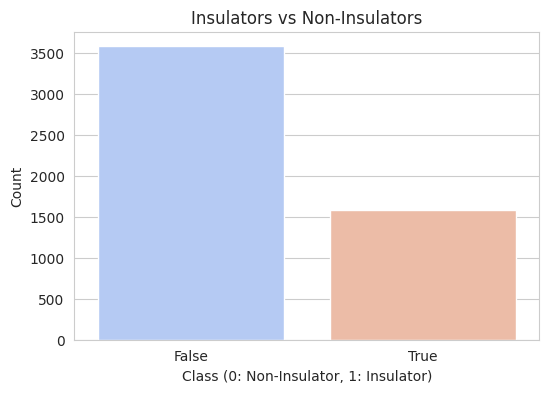

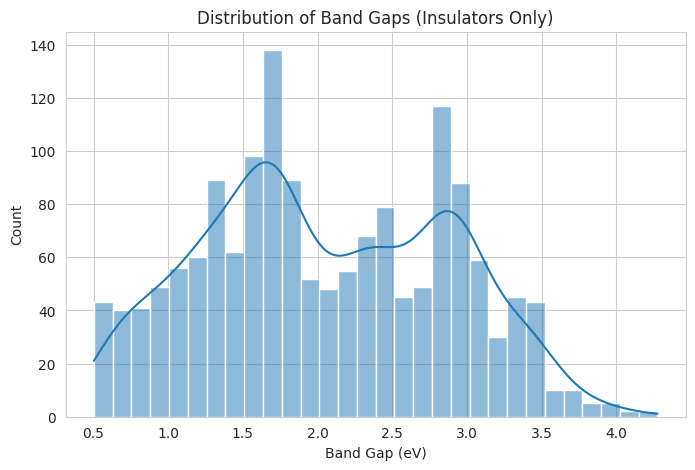

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 119861 (\N{MATHEMATICAL ITALIC CAPITAL B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


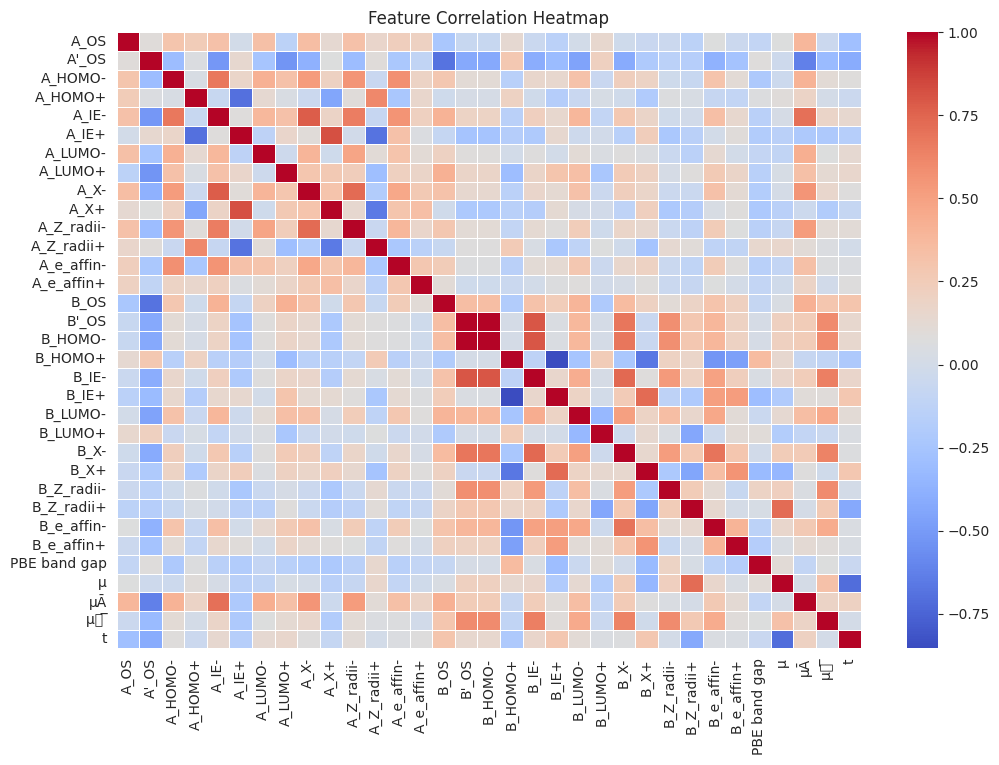

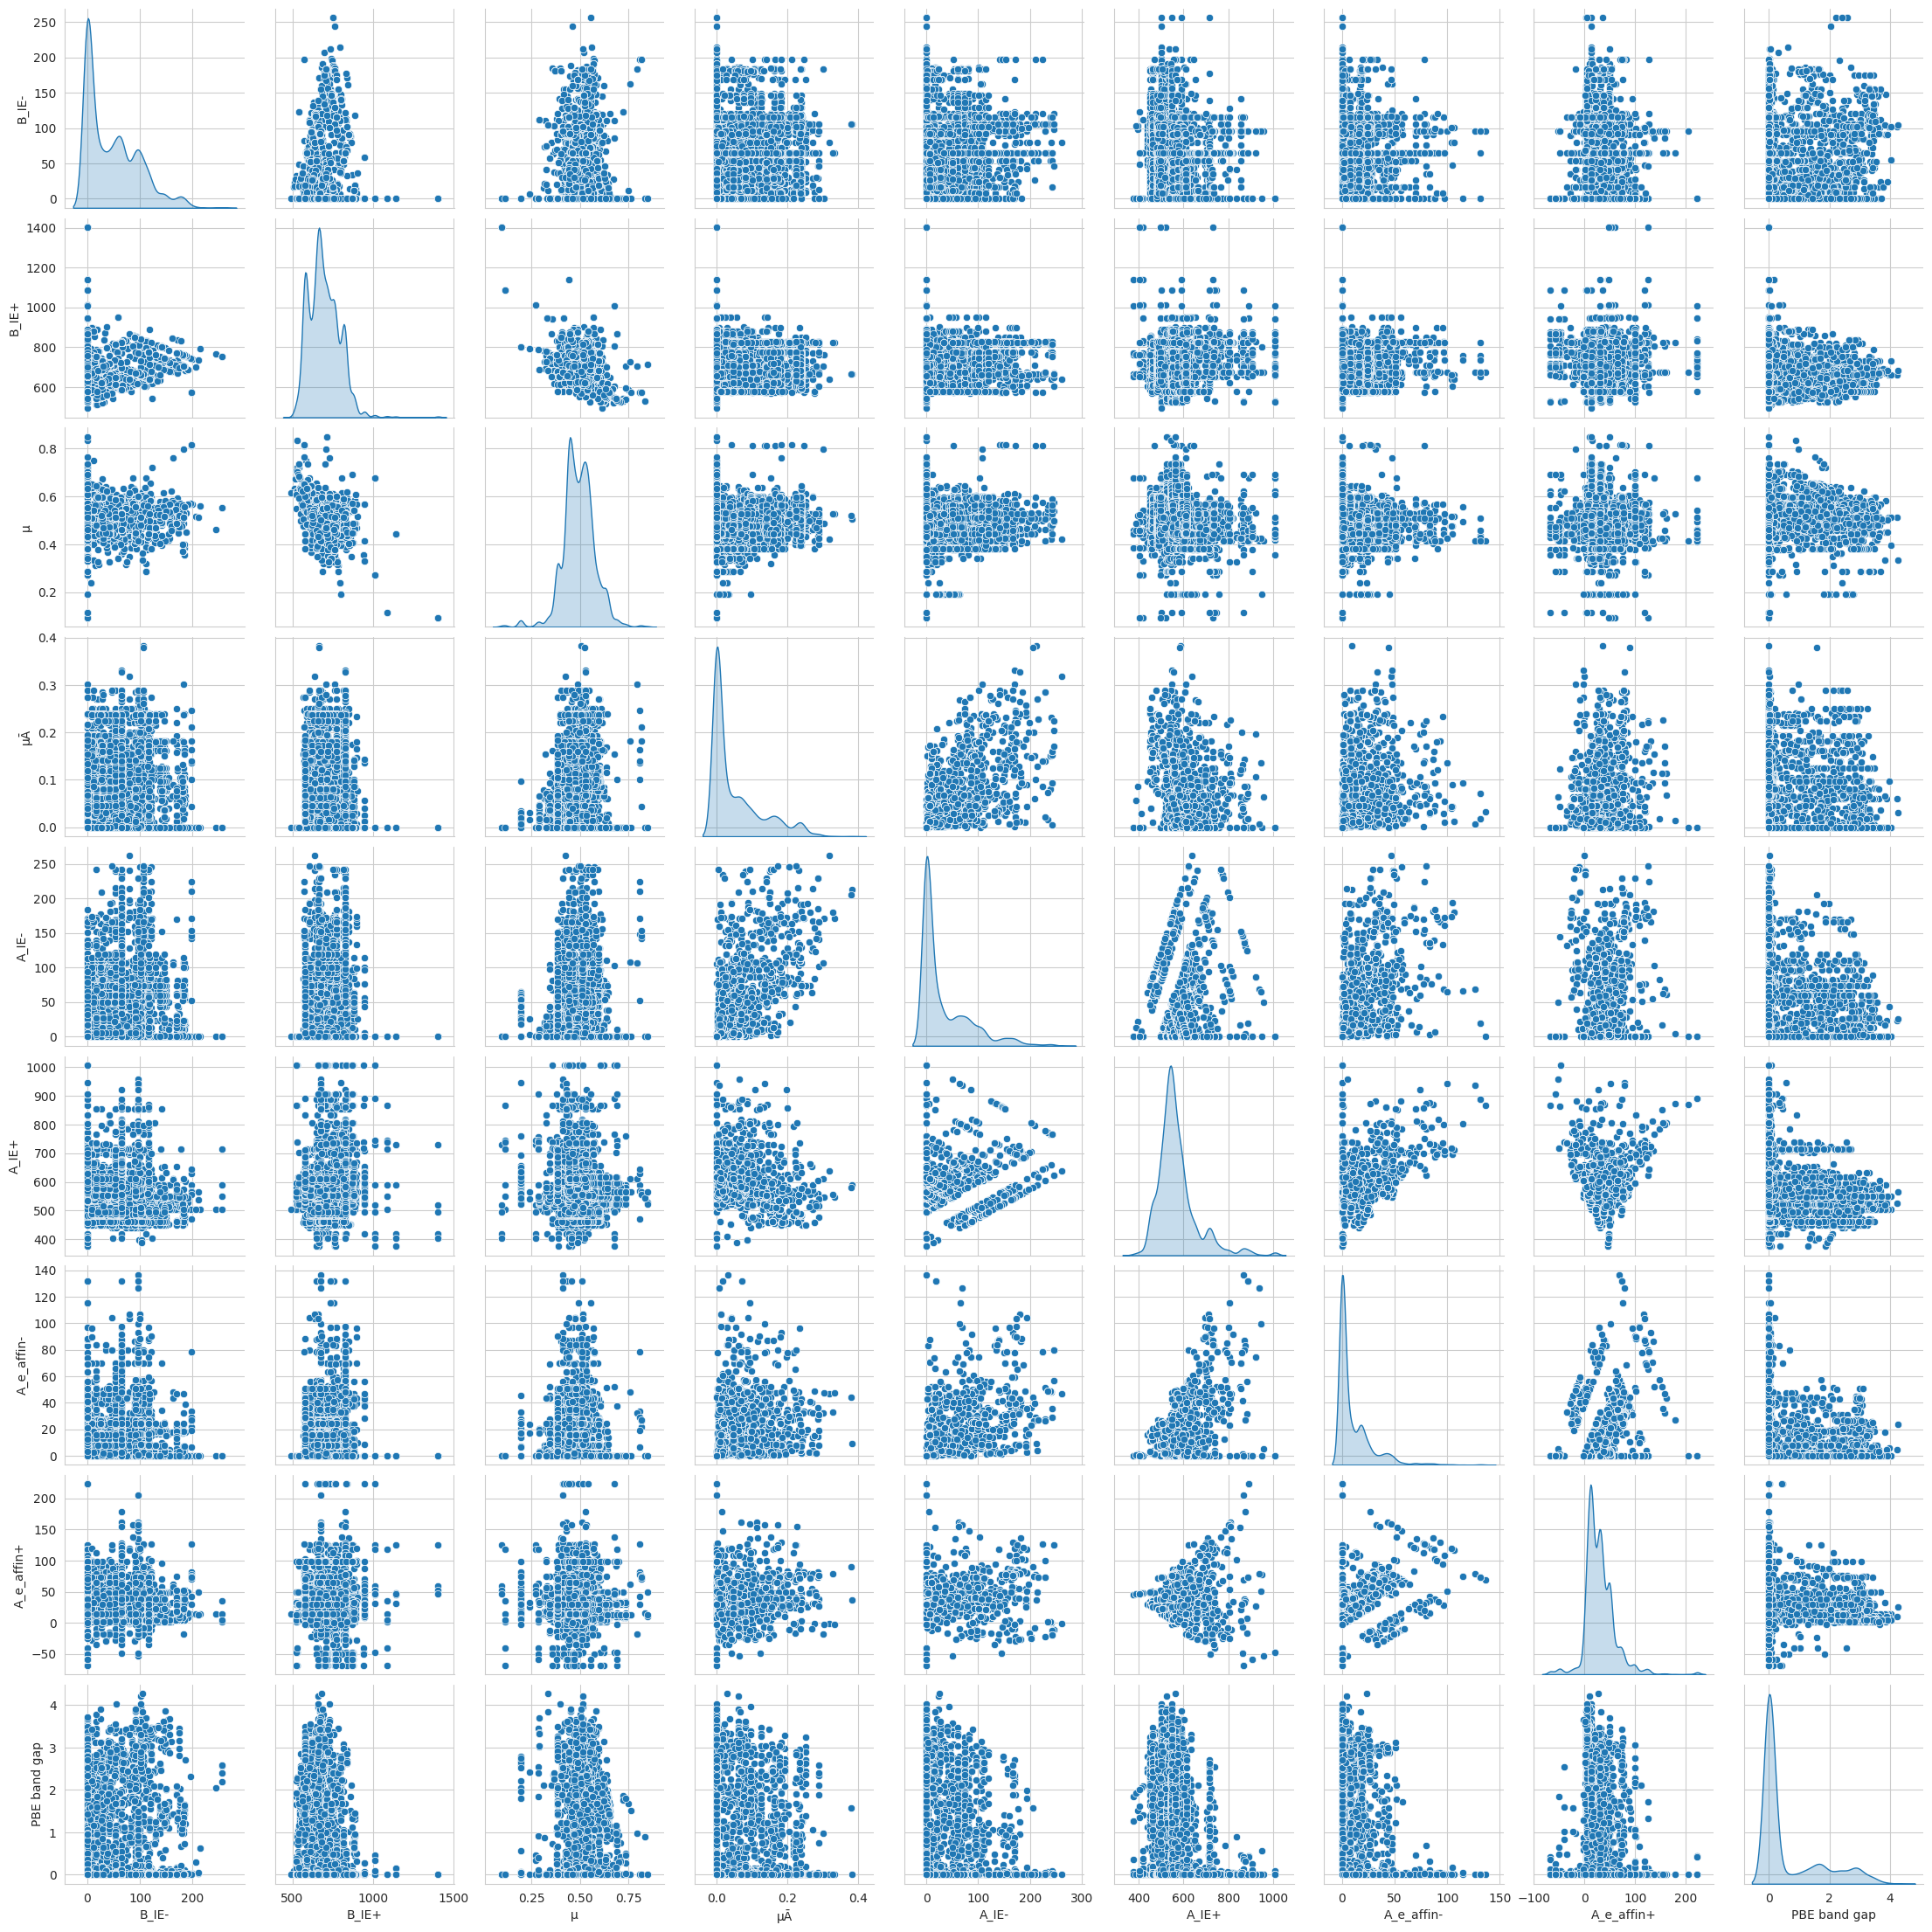

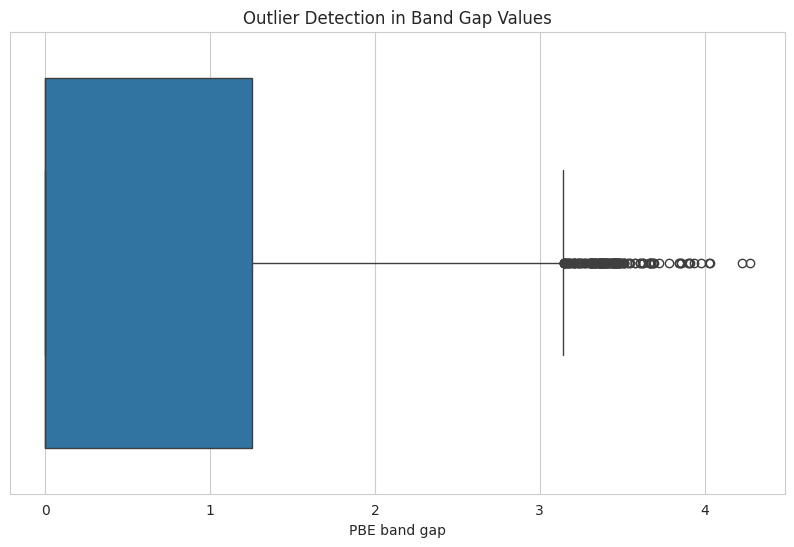


Top Features Correlated with Band Gap:
PBE band gap    1.000000
B_HOMO+         0.362042
B_Z_radii-      0.193720
A_Z_radii+      0.148001
μ               0.105342
B_LUMO+         0.101620
A'_OS           0.081112
μ𝐵 ̅            0.069675
A_HOMO+         0.060826
B_IE-           0.040821
Name: PBE band gap, dtype: float64


In [123]:
# Display basic info and check for missing values
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Binary Classification Target Analysis
plt.figure(figsize=(6,4))
sns.countplot(x=df['PBE band gap'] >= 0.5, palette='coolwarm')
plt.title("Insulators vs Non-Insulators")
plt.xlabel("Class (0: Non-Insulator, 1: Insulator)")
plt.ylabel("Count")
plt.show()

# Regression Target Distribution (Only for Insulators)
plt.figure(figsize=(8,5))
sns.histplot(df[df['PBE band gap'] >= 0.5]['PBE band gap'], bins=30, kde=True)
plt.title("Distribution of Band Gaps (Insulators Only)")
plt.xlabel("Band Gap (eV)")
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(12,8))
corr_matrix = df.drop(['A',"A'",'Bi',"B'",'functional group'],axis=1).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for selected features
selected_features = ['B_IE-', 'B_IE+' , 'μ', 'μĀ','A_IE-', 'A_IE+', 'A_e_affin-', 'A_e_affin+', 'PBE band gap']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

# Boxplot for detecting outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['PBE band gap'])
plt.title("Outlier Detection in Band Gap Values")
plt.show()

# Correlation of Features with Band Gap
corr_target = corr_matrix['PBE band gap'].sort_values(ascending=False)
print("\nTop Features Correlated with Band Gap:")
print(corr_target.head(10))

Function for Converting Atomic Symbol to its Atomic Number

In [124]:
def get_atomic_number(symbol):
    try:
        return Element(symbol).number
    except ValueError:
        return None  # Handle cases where the symbol is invalid

# Apply the function to the 'A', 'A\'', 'Bi', and 'B\'' columns
df['A_atomic_number'] = df['A'].apply(get_atomic_number)
df['A\'_atomic_number'] = df['A\''].apply(get_atomic_number)
df['Bi_atomic_number'] = df['Bi'].apply(get_atomic_number)
df['B\'_atomic_number'] = df['B\''].apply(get_atomic_number)

df = df.drop(['A', 'A\'', 'Bi', 'B\''], axis=1)

Categorising the material as Insulator(1), Non- Insulator(0) on the basis of PBE Band Gap

In [125]:
df['material_type'] = np.where(df['PBE band gap'] >= 0.5, 1, 0)
df.head()

,functional group,A_OS,A'_OS,A_HOMO-,A_HOMO+,A_IE-,A_IE+,A_LUMO-,A_LUMO+,A_X-,...,PBE band gap,μ,μĀ,μ𝐵 ̅,t,A_atomic_number,A'_atomic_number,Bi_atomic_number,B'_atomic_number,material_type
0,AgBaAuCdO6,3,2,0.585,-3.820,114.05,616.95,0.6485,-1.3775,0.52,...,0.0000,0.54286,0.13571,0.13571,0.92317,47,56,79,48,0
1,AgBaAuHgO6,3,2,0.585,-3.820,114.05,616.95,0.6485,-1.3775,0.52,...,0.0000,0.56786,0.13571,0.16071,0.90845,47,56,79,80,0
2,AgBaMoCdO6,3,2,0.585,-3.820,114.05,616.95,0.6485,-1.3775,0.52,...,0.0000,0.55714,0.13571,0.12143,0.91470,47,56,42,48,0
3,AgBiO3,1,1,0.000,-4.405,0.00,731.00,0.0000,-0.7290,0.00,...,0.0000,0.54286,0.00000,0.00000,0.94608,47,47,83,83,0
4,AgBrO3,1,1,0.000,-4.405,0.00,731.00,0.0000,-0.7290,0.00,...,0.1524,0.44286,0.00000,0.00000,1.01165,47,47,35,35,0


Getting External Features of the Functional Group from Magpie

In [126]:
magpie_featurizer = ElementProperty.from_preset("magpie")
feature_names = magpie_featurizer.feature_labels()
# Print feature names
print(feature_names)

['MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number', 'MagpieData avg_dev Number', 'MagpieData mode Number', 'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber', 'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber', 'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber', 'MagpieData minimum AtomicWeight', 'MagpieData maximum AtomicWeight', 'MagpieData range AtomicWeight', 'MagpieData mean AtomicWeight', 'MagpieData avg_dev AtomicWeight', 'MagpieData mode AtomicWeight', 'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT', 'MagpieData range MeltingT', 'MagpieData mean MeltingT', 'MagpieData avg_dev MeltingT', 'MagpieData mode MeltingT', 'MagpieData minimum Column', 'MagpieData maximum Column', 'MagpieData range Column', 'MagpieData mean Column', 'MagpieData avg_dev Column', 'MagpieData mode Column', 'MagpieData minimum Row', 'MagpieData maximum Row', 'MagpieData ran

/usr/local/lib/python3.11/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


Function to Combine the to data frame to make new dataframe with original and external features

In [127]:
df.set_index('functional group',inplace=True)

# Create an empty DataFrame to store the features of functional groups
functional_group_features_df = pd.DataFrame()

# Iterate through the unique functional groups in the DataFrame
for functional_group in df.index.unique():
    try:
        # Extract features using matminer
        features = magpie_featurizer.featurize(Composition(functional_group))
        # Create a DataFrame with the extracted features
        feature_df = pd.DataFrame([features], columns=magpie_featurizer.feature_labels())
        # Insert the functional group as the first column
        feature_df.insert(0, 'functional group', functional_group)
        # Append the features of the current functional group to the main DataFrame
        functional_group_features_df = pd.concat([functional_group_features_df, feature_df], ignore_index=True)
    except:
        print(f"Could not featurize {functional_group}")

# Reset the index for both DataFrames to ensure a proper merge
df = df.reset_index()
functional_group_features_df = functional_group_features_df.reset_index()

# Merge the original DataFrame with the functional group features DataFrame
# based on the 'functional group' column
combined_df = pd.merge(df, functional_group_features_df, on='functional group', how='left')

In [128]:
combined_df

,functional group,A_OS,A'_OS,A_HOMO-,A_HOMO+,A_IE-,A_IE+,A_LUMO-,A_LUMO+,A_X-,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,AgBaAuCdO6,3,2,0.5850,-3.8200,114.05,616.95,0.6485,-1.3775,0.520,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,94.5,99.00,12.0
1,AgBaAuHgO6,3,2,0.5850,-3.8200,114.05,616.95,0.6485,-1.3775,0.520,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,91.7,95.64,12.0
2,AgBaMoCdO6,3,2,0.5850,-3.8200,114.05,616.95,0.6485,-1.3775,0.520,...,0.000000,0.000000,0.000000,0.0,12.0,229.0,217.0,94.9,99.48,12.0
3,AgBiO3,1,1,0.0000,-4.4050,0.00,731.00,0.0000,-0.7290,0.000,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,54.6,68.16,12.0
4,AgBrO3,1,1,0.0000,-4.4050,0.00,731.00,0.0000,-0.7290,0.000,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,65.0,64.00,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,ZrDyAl2O6,4,2,0.5805,-3.0875,43.90,616.10,0.6305,-2.8775,0.055,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,91.0,94.80,12.0
5148,ZrMgFe2O6,4,2,0.5190,-4.1870,38.85,698.85,1.0900,-2.4180,0.010,...,2.110663,0.422133,0.675412,0.0,12.0,229.0,217.0,91.8,95.76,12.0
5149,ZrNdAl2O6,4,2,0.3440,-3.3240,65.15,594.85,0.3140,-3.1940,0.095,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,91.0,94.80,12.0
5150,ZrSmAl2O6,4,2,0.4355,-3.2325,58.40,601.60,0.4050,-3.1030,0.080,...,0.000000,0.000000,0.000000,0.0,12.0,225.0,213.0,88.2,91.44,12.0


Categorising the material as Insulator(1), Non- Insulator(0) on the basis of PBE Band Gap for combined df

In [129]:
# Create the 'material_type' column based on the PBE band gap
combined_df['material_type'] = np.where(combined_df['PBE band gap'] >= 0.5, 1, 0)

combined_df.head()

,functional group,A_OS,A'_OS,A_HOMO-,A_HOMO+,A_IE-,A_IE+,A_LUMO-,A_LUMO+,A_X-,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,AgBaAuCdO6,3,2,0.585,-3.820,114.05,616.95,0.6485,-1.3775,0.52,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,94.5,99.00,12.0
1,AgBaAuHgO6,3,2,0.585,-3.820,114.05,616.95,0.6485,-1.3775,0.52,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,91.7,95.64,12.0
2,AgBaMoCdO6,3,2,0.585,-3.820,114.05,616.95,0.6485,-1.3775,0.52,...,0.0,0.0,0.0,0.0,12.0,229.0,217.0,94.9,99.48,12.0
3,AgBiO3,1,1,0.000,-4.405,0.00,731.00,0.0000,-0.7290,0.00,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,54.6,68.16,12.0
4,AgBrO3,1,1,0.000,-4.405,0.00,731.00,0.0000,-0.7290,0.00,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,65.0,64.00,12.0


In [130]:
df.set_index('functional group',inplace=True)

In [131]:
!pip install catboost

**Original Data Regression and Classification**

NOTE : IN INSTALLING CATBOOST THERE IS A DEPENDENCY PROBLEM WHICH CAUSES ERROR SO RESTART THE SESSION AND ONCE MORE RUN ALL THE CELLS TO GET RESULTS.

Regression Problem Using Stacking Regressor

Stacking Regressor - R² Score: 0.8426
Stacking Regressor - MSE: 0.0978


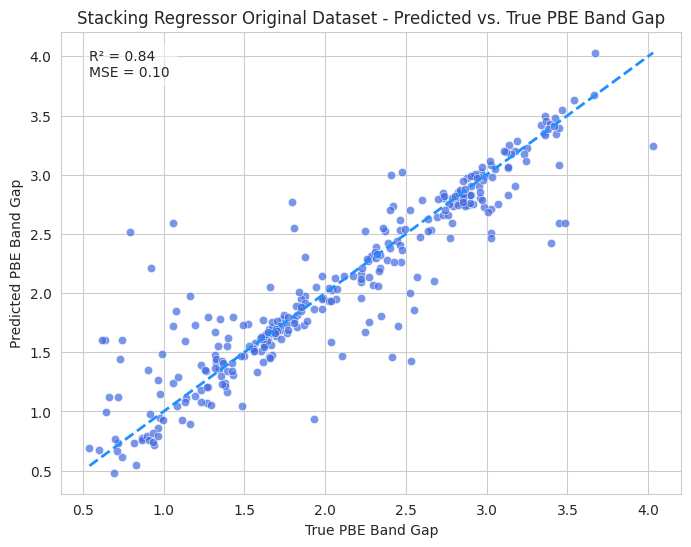

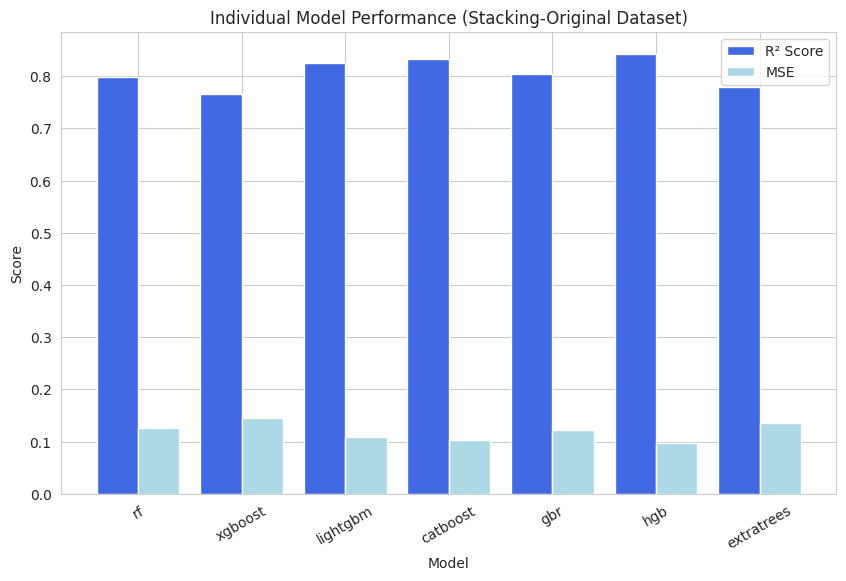

In [132]:
from catboost import CatBoostClassifier,CatBoostRegressor
df_insulators = df[df['material_type'] == 1]
X = df_insulators.drop(['material_type', 'PBE band gap'], axis=1)
y = df_insulators['PBE band gap']
Original_columns= X.columns
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
models = {
    "rf": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "xgboost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42),
    "lightgbm": LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42,verbose=-1),
    "catboost": CatBoostRegressor(n_estimators=200, learning_rate=0.1, depth=10, random_state=42, verbose=0),
    "gbr": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42),
    "hgb": HistGradientBoostingRegressor(max_iter=200, learning_rate=0.1, max_depth=10, random_state=42),
    "extratrees": ExtraTreesRegressor(n_estimators=200, max_depth=10, random_state=42),
}

# Define stacking regressor
stacking_regressor_org = StackingRegressor(
    estimators=list(models.items()),
    final_estimator=Ridge(alpha=1.0)  # Ridge as the meta-learner
)

stacking_regressor_org.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacking = stacking_regressor_org.predict(X_test)
r2_stacking = r2_score(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)

print(f"Stacking Regressor - R² Score: {r2_stacking:.4f}")
print(f"Stacking Regressor - MSE: {mse_stacking:.4f}")

# Plot predicted vs. true values
# Set Seaborn style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_stacking, alpha=0.7, color="royalblue")

# Plot diagonal line (ideal predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='dodgerblue', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel("True PBE Band Gap")
plt.ylabel("Predicted PBE Band Gap")
plt.title("Stacking Regressor Original Dataset - Predicted vs. True PBE Band Gap")

# Display R² and MSE
plt.text(min(y_test), max(y_test) * 0.95, f'R² = {r2_stacking:.2f}\nMSE = {mse_stacking:.2f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Show plot
plt.show()

# Evaluate individual models
results = {}
for name, model in stacking_regressor_org.named_estimators_.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R²': r2, 'MSE': mse}

# Bar plot of individual model performance
r2_scores = [results[model]['R²'] for model in results]
mse_scores = [results[model]['MSE'] for model in results]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(model_names))
plt.bar(X_axis - 0.2, r2_scores, 0.4, label='R² Score', color='royalblue')
plt.bar(X_axis + 0.2, mse_scores, 0.4, label='MSE', color='lightblue')
plt.xticks(X_axis, model_names, rotation=30)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Individual Model Performance (Stacking-Original Dataset)")
plt.legend()
plt.show()

In [133]:
perm_importance_reg_org = permutation_importance(stacking_regressor_org, X_train, y_train, n_repeats=5, random_state=42)

Classification Problem Using Stacking Classifiers

Stacking Classifier - Accuracy: 0.9282
Stacking Classifier - Precision: 0.9311
Stacking Classifier - Recall: 0.8427
Stacking Classifier - F1 Score: 0.8847

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       694
           1       0.93      0.84      0.88       337

    accuracy                           0.93      1031
   macro avg       0.93      0.91      0.92      1031
weighted avg       0.93      0.93      0.93      1031



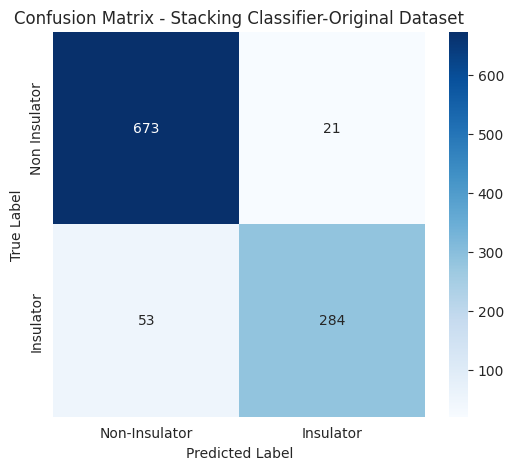

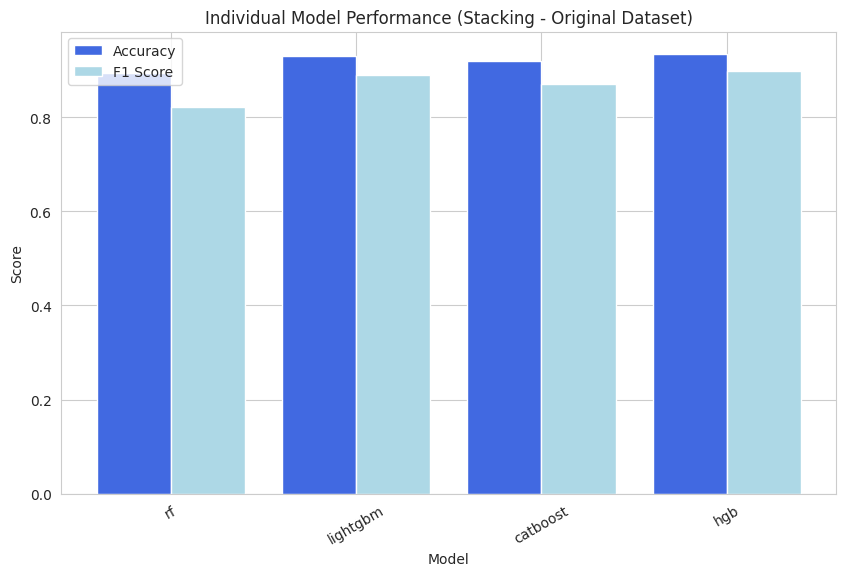

Stacking Classifier - ROC AUC: 0.9747


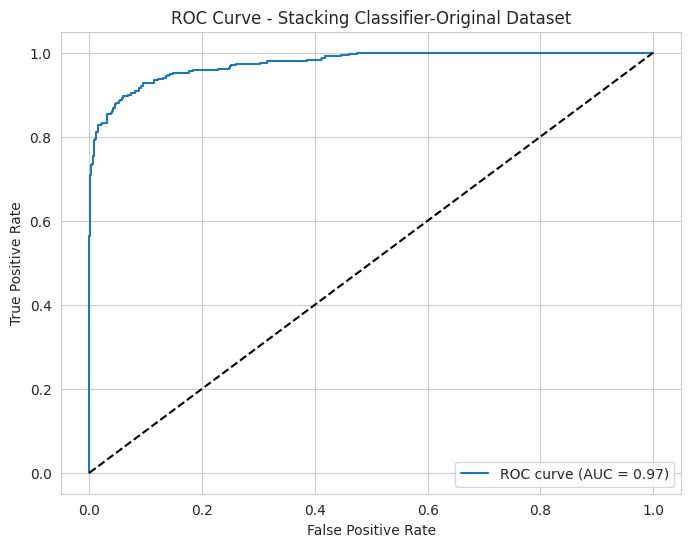

In [134]:
X = df.drop(['material_type', 'PBE band gap'], axis=1)  # Removed 'PBE band gap'
y = df['material_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
models = {
    "rf": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "lightgbm": LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42,verbose=-1),
    "catboost": CatBoostClassifier(n_estimators=200, learning_rate=0.1, depth=10, random_state=42, verbose=0),
    "hgb": HistGradientBoostingClassifier(max_iter=200, learning_rate=0.1, max_depth=10, random_state=42),
}
# Define stacking classifier
stacking_classifier_org = StackingClassifier(
    estimators=list(models.items()),
    final_estimator=LogisticRegression(),  # Logistic regression as the meta-learner
    stack_method="predict_proba"
)

# Train model
stacking_classifier_org.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacking = stacking_classifier_org.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_stacking)
precision = precision_score(y_test, y_pred_stacking)
recall = recall_score(y_test, y_pred_stacking)
f1 = f1_score(y_test, y_pred_stacking)

print(f"Stacking Classifier - Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier - Precision: {precision:.4f}")
print(f"Stacking Classifier - Recall: {recall:.4f}")
print(f"Stacking Classifier - F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacking))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=["Non-Insulator", "Insulator"], yticklabels=["Non Insulator", "Insulator"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier-Original Dataset")
plt.show()

# Evaluate individual models
results = {}
for name, model in stacking_classifier_org.named_estimators_.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': acc, 'F1 Score': f1}

# Bar plot of individual model performance
accuracy_scores = [results[model]['Accuracy'] for model in results]
f1_scores = [results[model]['F1 Score'] for model in results]
model_names = list(results.keys())

# Create a bar plot
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 6))
X_axis = np.arange(len(model_names))

# Plot grouped bars correctly using plt.bar()
plt.bar(X_axis - 0.2, accuracy_scores, width=0.4, color='royalblue', label='Accuracy')
plt.bar(X_axis + 0.2, f1_scores, width=0.4, color='lightblue', label='F1 Score')

# X-axis labels
plt.xticks(X_axis, model_names, rotation=30)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Individual Model Performance (Stacking - Original Dataset)")
plt.legend()

# Show plot
plt.show()

y_prob = stacking_classifier_org.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Stacking Classifier - ROC AUC: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier-Original Dataset')
plt.legend(loc="lower right")
plt.show()

In [135]:
perm_importance_class_org = permutation_importance(stacking_classifier_org, X_train, y_train, n_repeats=5, random_state=42)

**External Data + Original Data Regression and Classification**

Regression Problem Using Stacking Regressor

Stacking Regressor - R² Score: 0.8708
Stacking Regressor - MSE: 0.0803


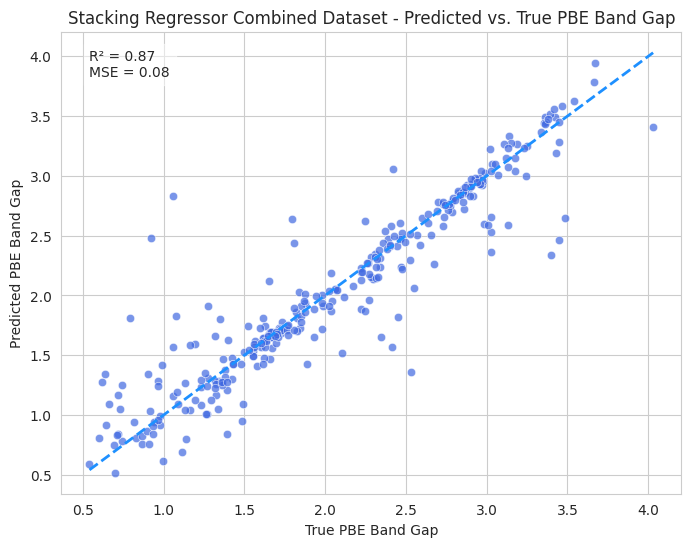

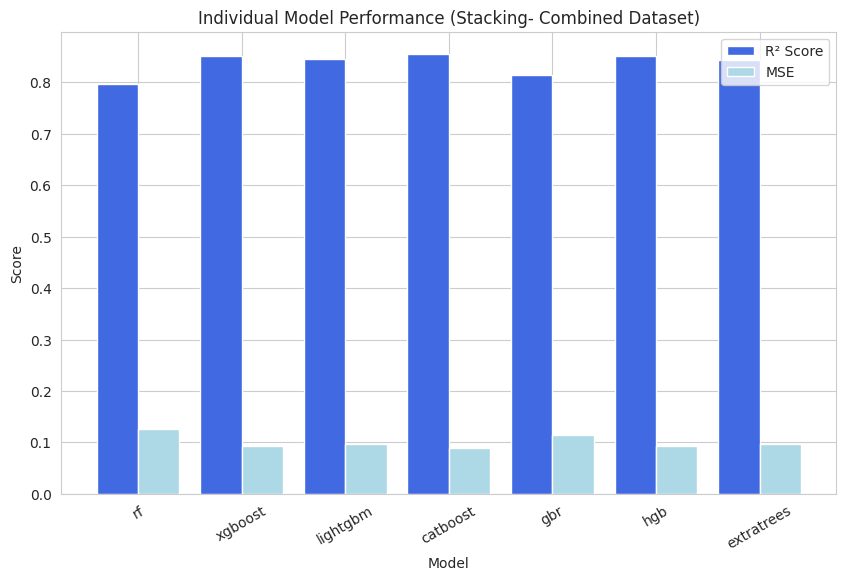

In [136]:
combined_df.set_index('functional group',inplace=True)
# Load dataset
df_insulators = combined_df[combined_df['material_type'] == 1]
X = df_insulators.drop(['material_type', 'PBE band gap', 'index'], axis=1)
y = df_insulators['PBE band gap']
combined_columns=X.columns
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
models = {
    "rf": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "xgboost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42),
    "lightgbm": LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42,verbose=-1),
    "catboost": CatBoostRegressor(n_estimators=200, learning_rate=0.1, depth=10, random_state=42, verbose=0),
    "gbr": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42),
    "hgb": HistGradientBoostingRegressor(max_iter=200, learning_rate=0.1, max_depth=10, random_state=42),
    "extratrees": ExtraTreesRegressor(n_estimators=200, max_depth=10, random_state=42),
}

# Define stacking regressor
stacking_regressor_comb = StackingRegressor(
    estimators=list(models.items()),
    final_estimator=Ridge(alpha=1.0)  # Ridge as the meta-learner
)

# Train model
stacking_regressor_comb.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacking = stacking_regressor_comb.predict(X_test)
r2_stacking = r2_score(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)

print(f"Stacking Regressor - R² Score: {r2_stacking:.4f}")
print(f"Stacking Regressor - MSE: {mse_stacking:.4f}")

# Plot predicted vs. true values
# Set Seaborn style
sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_stacking, alpha=0.7, color="royalblue")

# Plot diagonal line (ideal predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='dodgerblue', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel("True PBE Band Gap")
plt.ylabel("Predicted PBE Band Gap")
plt.title("Stacking Regressor Combined Dataset - Predicted vs. True PBE Band Gap")

# Display R² and MSE
plt.text(min(y_test), max(y_test) * 0.95, f'R² = {r2_stacking:.2f}\nMSE = {mse_stacking:.2f}',
         fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Show plot
plt.show()
# Evaluate individual models
results = {}
for name, model in stacking_regressor_comb.named_estimators_.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R²': r2, 'MSE': mse}

# Bar plot of individual model performance
r2_scores = [results[model]['R²'] for model in results]
mse_scores = [results[model]['MSE'] for model in results]
model_names = list(results.keys())

plt.figure(figsize=(10, 6))
X_axis = np.arange(len(model_names))
plt.bar(X_axis - 0.2, r2_scores, 0.4, label='R² Score', color='royalblue')
plt.bar(X_axis + 0.2, mse_scores, 0.4, label='MSE', color='lightblue')
plt.xticks(X_axis, model_names, rotation=30)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Individual Model Performance (Stacking- Combined Dataset)")
plt.legend()
plt.show()


In [137]:
perm_importance_reg_comb = permutation_importance(stacking_regressor_comb, X_train, y_train, n_repeats=5, random_state=42)

Classification Problem Using Stacking Classifier

Stacking Classifier - Accuracy: 0.9525
Stacking Classifier - Precision: 0.9586
Stacking Classifier - Recall: 0.8932
Stacking Classifier - F1 Score: 0.9247

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       694
           1       0.96      0.89      0.92       337

    accuracy                           0.95      1031
   macro avg       0.95      0.94      0.95      1031
weighted avg       0.95      0.95      0.95      1031



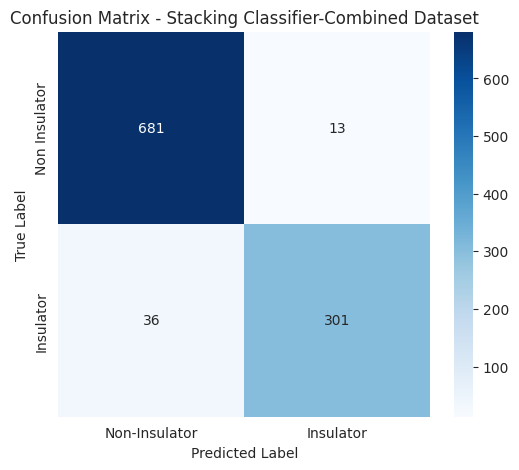

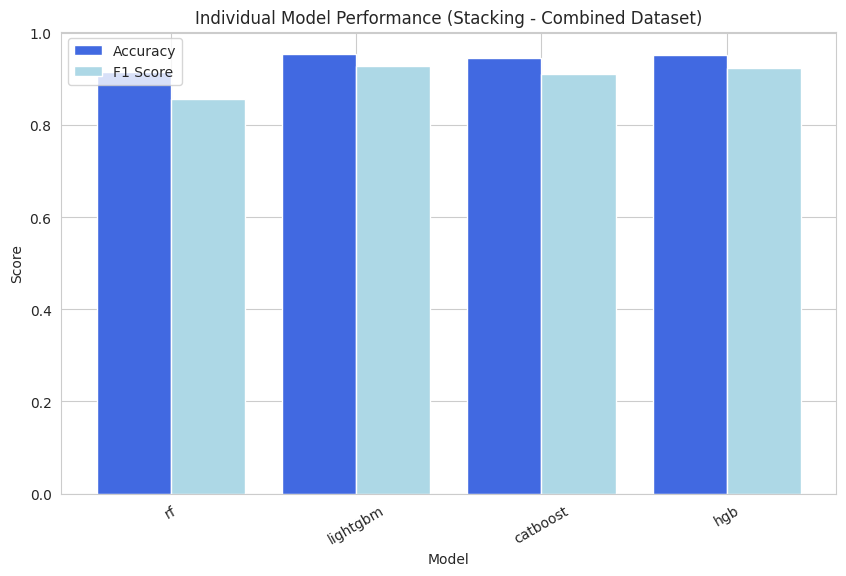

Stacking Classifier - ROC AUC: 0.9854


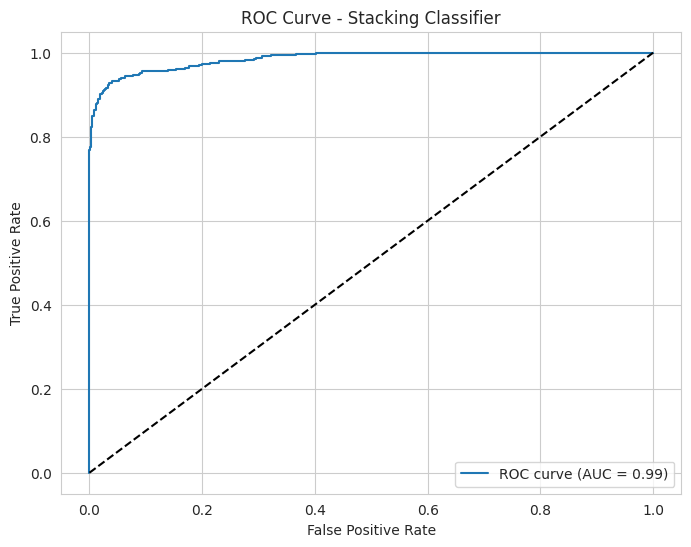

In [138]:
X = combined_df.drop(['material_type', 'PBE band gap','index'], axis=1)  # Removed 'PBE band gap'
y = combined_df['material_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
models = {
    "rf": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "lightgbm": LGBMClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42,verbose=-1),
    "catboost": CatBoostClassifier(n_estimators=200, learning_rate=0.1, depth=10, random_state=42, verbose=0),
    "hgb": HistGradientBoostingClassifier(max_iter=200, learning_rate=0.1, max_depth=10, random_state=42),
}

# Define stacking classifier
stacking_classifier_comb = StackingClassifier(
    estimators=list(models.items()),
    final_estimator=LogisticRegression(),  # Logistic regression as the meta-learner
    stack_method="predict_proba"
)

# Train model
stacking_classifier_comb.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacking = stacking_classifier_comb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_stacking)
precision = precision_score(y_test, y_pred_stacking)
recall = recall_score(y_test, y_pred_stacking)
f1 = f1_score(y_test, y_pred_stacking)

print(f"Stacking Classifier - Accuracy: {accuracy:.4f}")
print(f"Stacking Classifier - Precision: {precision:.4f}")
print(f"Stacking Classifier - Recall: {recall:.4f}")
print(f"Stacking Classifier - F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_stacking))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=["Non-Insulator", "Insulator"], yticklabels=["Non Insulator", "Insulator"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Stacking Classifier-Combined Dataset")
plt.show()


# Evaluate individual models
results = {}
for name, model in stacking_classifier_comb.named_estimators_.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': acc, 'F1 Score': f1}

# Bar plot of individual model performance
accuracy_scores = [results[model]['Accuracy'] for model in results]
f1_scores = [results[model]['F1 Score'] for model in results]
model_names = list(results.keys())

sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 6))
X_axis = np.arange(len(model_names))

# Plot grouped bars correctly using plt.bar()
plt.bar(X_axis - 0.2, accuracy_scores, width=0.4, color='royalblue', label='Accuracy')
plt.bar(X_axis + 0.2, f1_scores, width=0.4, color='lightblue', label='F1 Score')

# X-axis labels
plt.xticks(X_axis, model_names, rotation=30)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Individual Model Performance (Stacking - Combined Dataset)")
plt.legend()

# Show plot
plt.show()

y_prob = stacking_classifier_comb.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Stacking Classifier - ROC AUC: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc="lower right")
plt.show()


In [139]:
perm_importance_class_comb = permutation_importance(stacking_classifier_comb, X_train, y_train, n_repeats=5, random_state=42)

In [140]:
regression_importance_org = np.array(perm_importance_reg_org.importances_mean).reshape(-1)
classification_importance_org = np.array(perm_importance_class_org.importances_mean).reshape(-1)

# Create DataFrame
feature_importance_df_org = pd.DataFrame({
    "Regression": regression_importance_org,
    "Classification": classification_importance_org
}, index=Original_columns)  # Assuming X_train is your training data


In [141]:
regression_importance_comb = np.array(perm_importance_reg_comb.importances_mean).reshape(-1)
classification_importance_comb = np.array(perm_importance_class_comb.importances_mean).reshape(-1)

# Create DataFrame
feature_importance_df_comb = pd.DataFrame({
    "Regression": regression_importance_comb,
    "Classification": classification_importance_comb
}, index=combined_columns)

<ipython-input-142-944d517e6828>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


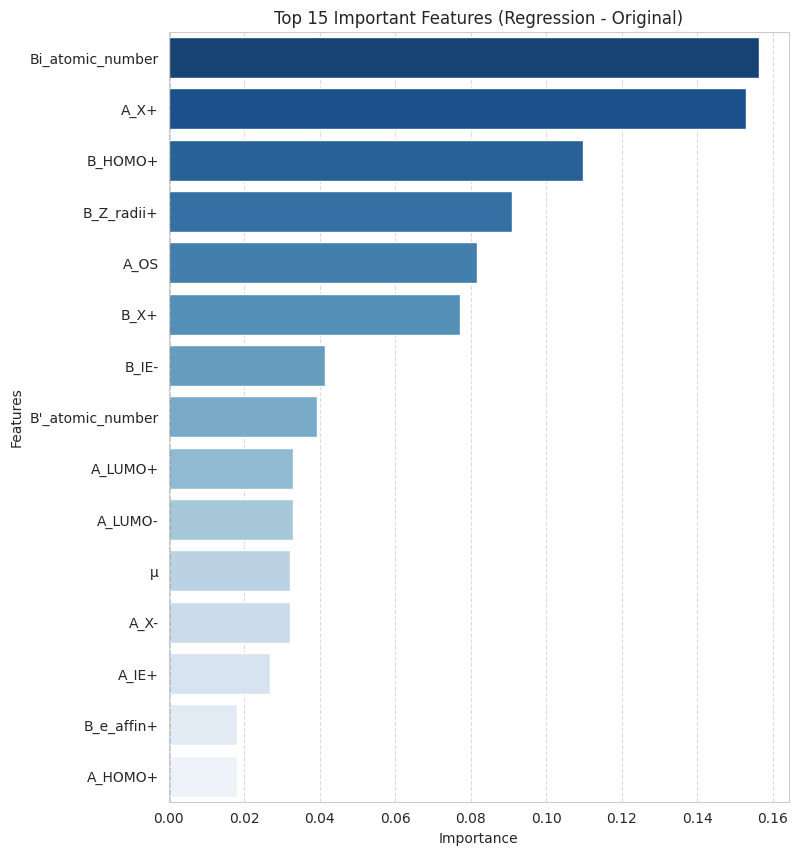

<ipython-input-142-944d517e6828>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


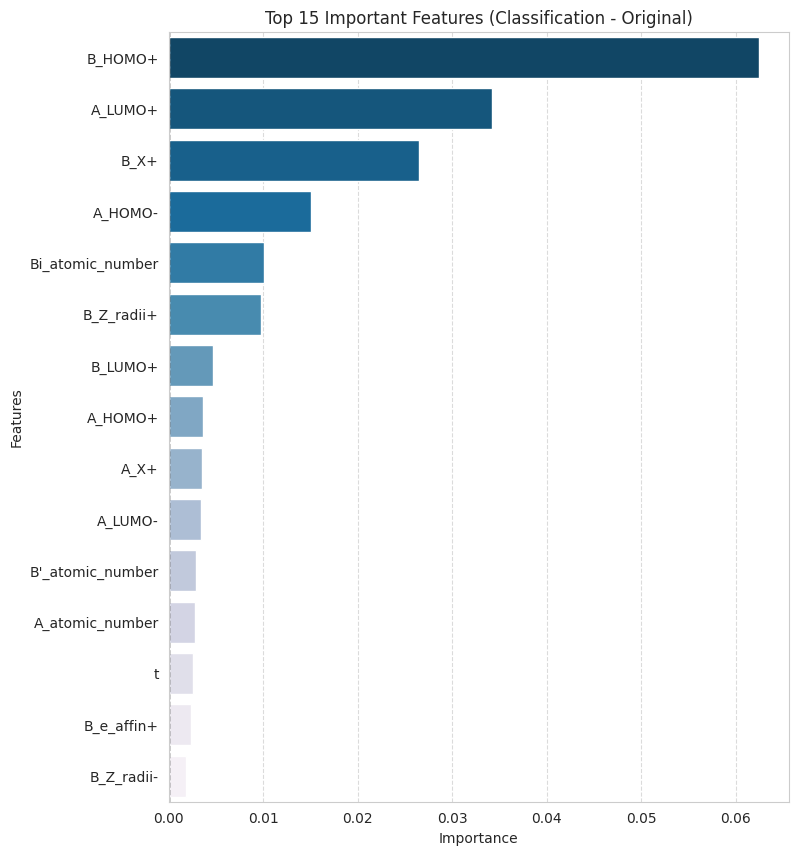

In [142]:
# Compute absolute importance to determine top features
feature_importance_df_org["Abs_Regression"] = np.abs(feature_importance_df_org["Regression"])
feature_importance_df_org["Abs_Classification"] = np.abs(feature_importance_df_org["Classification"])

# Select top 20 features based on absolute importance
top_regression = feature_importance_df_org.nlargest(15, "Abs_Regression").drop(columns=["Abs_Regression"])
top_classification = feature_importance_df_org.nlargest(15, "Abs_Classification").drop(columns=["Abs_Classification"])

# Plot Regression Feature Importance (Original Values)
plt.figure(figsize=(8, 10))
sns.barplot(
    y=top_regression.index, x=top_regression["Regression"],
    palette="Blues_r", orient="h"
)
plt.axvline(x=0, color='black', linestyle="--", linewidth=1)  # Vertical line at 0 for reference
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Top 15 Important Features (Regression - Original)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Plot Classification Feature Importance (Original Values)
plt.figure(figsize=(8, 10))
sns.barplot(
    y=top_classification.index, x=top_classification["Classification"],
    palette="PuBu_r", orient="h"
)
plt.axvline(x=0, color='black', linestyle="--", linewidth=1)  # Vertical line at 0 for reference
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Top 15 Important Features (Classification - Original)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


<ipython-input-143-d47d0a034f66>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


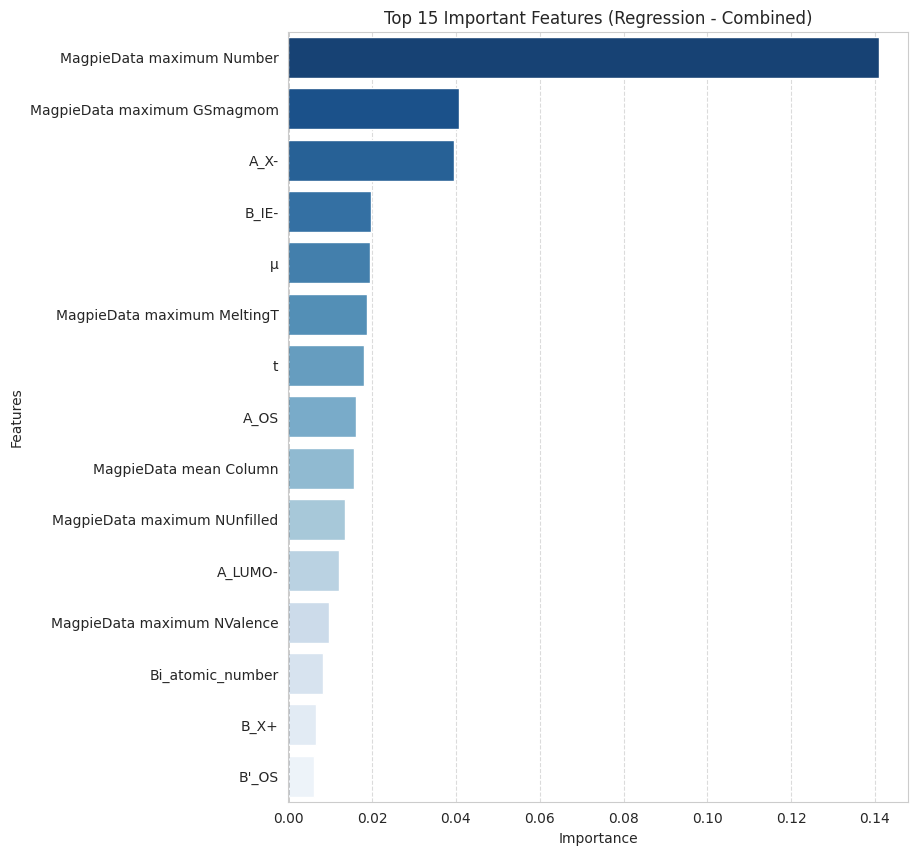

<ipython-input-143-d47d0a034f66>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


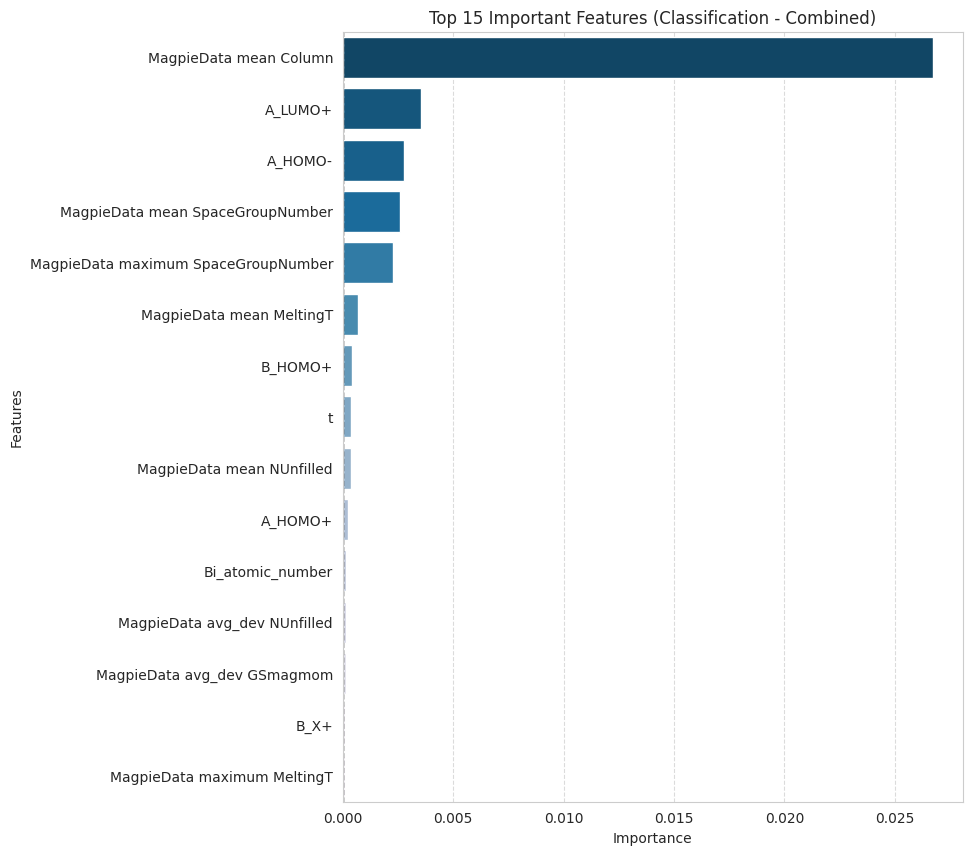

In [143]:

# Compute absolute importance to determine top features
feature_importance_df_comb["Abs_Regression"] = np.abs(feature_importance_df_comb["Regression"])
feature_importance_df_comb["Abs_Classification"] = np.abs(feature_importance_df_comb["Classification"])

# Select top 20 features based on absolute importance
top_regression = feature_importance_df_comb.nlargest(15, "Abs_Regression").drop(columns=["Abs_Regression"])
top_classification = feature_importance_df_comb.nlargest(15, "Abs_Classification").drop(columns=["Abs_Classification"])

# Plot Regression Feature Importance (Original Values)
plt.figure(figsize=(8, 10))
sns.barplot(
    y=top_regression.index, x=top_regression["Regression"],
    palette="Blues_r", orient="h"
)
plt.axvline(x=0, color='black', linestyle="--", linewidth=1)  # Vertical line at 0 for reference
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Top 15 Important Features (Regression - Combined)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Plot Classification Feature Importance (Original Values)
plt.figure(figsize=(8, 10))
sns.barplot(
    y=top_classification.index, x=top_classification["Classification"],
    palette="PuBu_r", orient="h"
)
plt.axvline(x=0, color='black', linestyle="--", linewidth=1)  # Vertical line at 0 for reference
plt.ylabel("Features")
plt.xlabel("Importance")
plt.title("Top 15 Important Features (Classification - Combined)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [147]:
top_classification

,Regression,Classification,Abs_Regression
MagpieData mean Column,0.015589,0.026741,0.015589
A_LUMO+,0.003379,0.003543,0.003379
A_HOMO-,-0.000500,0.002766,0.000500
MagpieData mean SpaceGroupNumber,-0.001732,0.002572,0.001732
MagpieData maximum SpaceGroupNumber,-0.000925,0.002281,0.000925
MagpieData mean MeltingT,-0.002035,0.000679,0.002035
B_HOMO+,-0.000083,0.000437,0.000083
t,0.018023,0.000388,0.018023
MagpieData mean NUnfilled,-0.001587,0.000388,0.001587
A_HOMO+,0.002861,0.000243,0.002861


from matplotlib import pyplot as plt
top_classification['Regression'].plot(kind='hist', bins=20, title='Regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_classification['Classification'].plot(kind='hist', bins=20, title='Classification')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_classification['Abs_Regression'].plot(kind='hist', bins=20, title='Abs_Regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_classification.plot(kind='scatter', x='Regression', y='Classification', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_classification.plot(kind='scatter', x='Classification', y='Abs_Regression', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
top_classification['Regression'].plot(kind='line', figsize=(8, 4), title='Regression')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_classification['Classification'].plot(kind='line', figsize=(8, 4), title='Classification')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
top_classification['Abs_Regression'].plot(kind='line', figsize=(8, 4), title='Abs_Regression')
plt.gca().spines[['top', 'right']].set_visible(False)

In [148]:
feature_importance_df_comb.to_excel('feature_importance_df_comb.xlsx', index=True)

In [149]:
feature_importance_df_org.to_excel('feature_importance_df_org.xlsx', index=True)